<h1 align ='center'>Calculating Galaxy Distance Using Spectra </h1>



#### Authors

##### Nafis Shyan
- **Position**: Student, Computer Science & Engineering  
- **Institution**: Dhaka University  
- **E-mail**: [shyannafis@gmail.com](mailto:shyannafis@gmail.com)

##### K M Shariat Ullah
- **Position**: Student, Electrical & Electronic Engineering  
- **Institution**: Shahjalal University of Science & Technology  
- **E-mail**: [cast.shariat@gmail.com](mailto:cast.shariat@gmail.com)



In [52]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from scipy.signal import find_peaks

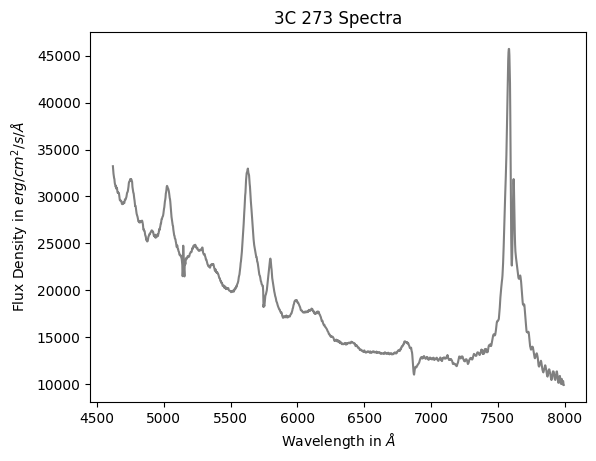

In [42]:
# load dataset
data = pd.read_csv('3c273.csv')

# slicing to get the H alpha line
wave = data.wavelength     
intensity = data.intensity

plt.plot(wave, intensity, color='gray')
plt.title('3C 273 Spectra')
plt.xlabel('Wavelength in $\\AA$')
plt.ylabel('Flux Density in $erg/cm^2/s/\\AA$')
plt.show()


<h3>Helper function</h1>

In [43]:
wave_a = np.array(wave)
intensity_a = np.array(intensity)

# index finding
def helper(x_np,target):
    index_6000 = np.searchsorted(x_np, target, side='left')
    if index_6000 < len(x_np) and x_np[index_6000] >= target:
        return index_6000
    else:
        return "Not found"

#index_start_H_alpha = helper(x_a,6500)
#index_end_H_alpha = helper(x_a,7000)

index_start_H_beta = helper(wave_a,4600)
index_end_H_beta = helper(wave_a,5700)

if isinstance(index_start_H_beta, str):
    print("Starting is NOT AN INTEGER")

if isinstance(index_end_H_beta, str):
    print("Starting is NOT AN INTEGER")



<h3>Slicing

[]

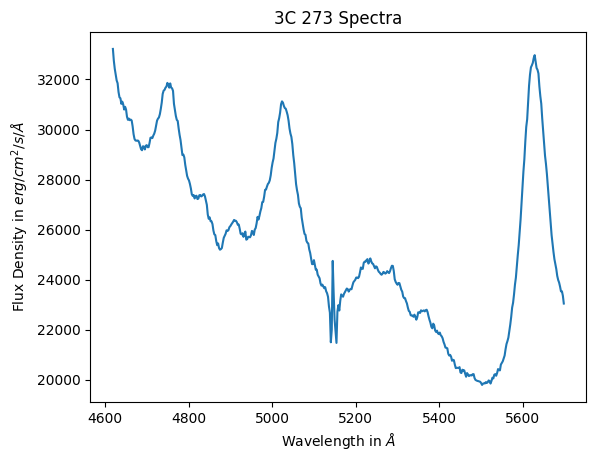

In [44]:
#X_alpha = x[index_start_H_alpha:index_end_H_alpha]
#Y_alpha = y[index_start_H_alpha:index_end_H_alpha]

X_beta = wave[index_start_H_beta:index_end_H_beta]
Y_beta = intensity[index_start_H_beta:index_end_H_beta]

#plt.plot(X_alpha,Y_alpha)
plt.plot(X_beta,Y_beta)
plt.title('3C 273 Spectra')
plt.xlabel('Wavelength in $\\AA$')
plt.ylabel('Flux Density in $erg/cm^2/s/\\AA$')
plt.plot()

In [45]:
# peak finding
peak= find_peaks(Y_beta, height= 32000)             
print(f"Red Shifted H Beta Line at: {wave[peak[0][0]]} Angstorm with Intensity {intensity[peak[0][0]]}")


Red Shifted H Beta Line at: 5628.78 Angstorm with Intensity 32973.18


In [51]:
# constants
c = 3e8                     # light velocity in m/s
H_0 = 72                      # km/s / MPc

# calculating red shift value
lemda_obs = 5628.78               # peak of 32973.18
lemda_src = 4861                  # H_beta

z = (lemda_obs - lemda_src)/lemda_src
print(f"Redshift Value of 3c273: {z:.6f}")

# velocity of the galaxy in km/s
v = c * z / 1000
print(f"Velocity of 3c273: {v:0.2f}")

# distance of the galaxy in MPc
d_spectra = v / H_0 
print(f"Distance of 3c273: {d_calc:0.2f}")

# distance of the galaxy in literature in MPc
d_act = 705.23

# error
error = abs((d_spectra-d_act)) / d_act * 100
print(f"Error: {error:0.2f} %")

Redshift Value of 3c273: 0.157947
Velocity of 3c273: 47384.08
Distance of 3c273: 676.92
Error: 6.68 %
